In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import argparse as ap
from scipy.fftpack import fft
from scipy.fftpack import fftfreq
from scipy.stats import linregress as linregress
from scipy.signal import find_peaks as fpeaks
from scipy.signal import peak_widths as peak_widthse
from scipy.fftpack import fftshift
from scipy import interpolate as spInt
import matplotlib.animation as manimation

plt.rc('text', usetex=True)

In [3]:
data1 = np.genfromtxt("data/multiData1/rate_0/avg_auto_corr.csv", delimiter=',')
data2 = np.genfromtxt("data/multiData1/rate_1/avg_auto_corr.csv", delimiter=',')
data3 = np.genfromtxt("data/multiData1/rate_2/avg_auto_corr.csv", delimiter=',')
data4 = np.genfromtxt("data/multiData1/rate_3/avg_auto_corr.csv", delimiter=',')
data5 = np.genfromtxt("data/multiData1/rate_4/avg_auto_corr.csv", delimiter=',')
data6 = np.genfromtxt("data/multiData1/rate_5/avg_auto_corr.csv", delimiter=',')
data7 = np.genfromtxt("data/multiData1/rate_6/avg_auto_corr.csv", delimiter=',')
data8 = np.genfromtxt("data/multiData1/rate_7/avg_auto_corr.csv", delimiter=',')

In [4]:
data1.shape

(512, 256)

In [5]:
r = np.arange(data1.shape[-1])

In [185]:
k = 180

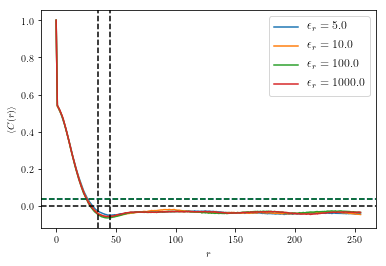

In [186]:
#data1[k, 0] = np.nan
#data2[k, 0] = np.nan
#data3[k, 0] = np.nan
#data4[k, 0] = np.nan
#r1 = r / 512
#g1 = data1[k, 1]
#g4 = data4[k,1]
l1 = data5[k, 0]   
l2 = data6[k, 0]   
l3 = data7[k, 0]   
l4 = data8[k, 0]
fig1, ax1 = plt.subplots(facecolor="white")
ax1.plot(r[0:256], data5[k,0:256] / l1, label=r'$\epsilon_r=5.0$')
ax1.plot(r[0:256], data6[k,0:256] / l2, label=r'$\epsilon_r=10.0$')
ax1.plot(r[0:256], data7[k,0:256] / l3, label=r'$\epsilon_r=100.0$')
ax1.plot(r[0:256], data8[k,0:256] / l4, label=r'$\epsilon_r=1000.0$')
ax1.axvline(45, linestyle='--', color='k')
ax1.axvline(35, linestyle='--', color='k')

ax1.axhline(0.0, linestyle='--', color='k')
ax1.axhline(data5[k, 1] * np.exp(-1), linestyle='--', color='b')
#ax1.axhline(l2, linestyle='--', color='orange')
ax1.axhline(data7[k, 1] * np.exp(-1), linestyle='--', color='g')
#ax1.axhline(l4, linestyle='--', color='r')
ax1.set_xlabel(r'$r$')
ax1.set_ylabel(r'$\langle C(r)\rangle$')
#ax1.set_xlim(left=0.0, right=0.3)
#ax1.set_ylim(bottom=-0.02, top=0.22)
ax1.legend(fontsize='large')

In [187]:
np.sum(data8[k, :] / l4)

0.5156612516000125

In [188]:
w = fftfreq(256) 

In [189]:
k1 = 1
k2 = 257
F1 = np.abs(fft(data5[k, k1:k2]/ l1, 256)) * 2 / 256
F2 = np.abs(fft(data6[k, k1:k2]/ l2, 256)) * 2 / 256
F3 = np.abs(fft(data7[k, k1:k2]/ l3, 256)) * 2 / 256
F4 = np.abs(fft(data8[k, k1:k2]/ l4, 256)) * 2 / 256
#w[np.argmax(F1)]
N = F1.shape[-1]

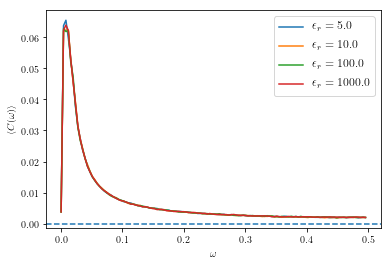

In [190]:
fig2, ax2 = plt.subplots(facecolor="white")
ax2.plot(w[0:N//2], F1[0:N//2], label=r'$\epsilon_r=5.0$')
ax2.plot(w[0:N//2], F2[0:N//2], label=r'$\epsilon_r=10.0$')
ax2.plot(w[0:N//2], F3[0:N//2], label=r'$\epsilon_r=100.0$')
ax2.plot(w[0:N//2], F4[0:N//2], label=r'$\epsilon_r=1000.0$')
ax2.axhline(0.0, linestyle='--')
ax2.set_xlabel(r'$\omega$')
ax2.set_ylabel(r'$\langle C(\omega)\rangle$')
#ax2.set_ylim(bottom=-0.02, top=0.12)
ax2.legend(fontsize='large')

In [191]:
FF = fft(data5[k, k1:k2] / l1, 256) * 2 / 256
FFA = np.abs(FF)
FFR = np.real(FF)
FFI = np.imag(FF)

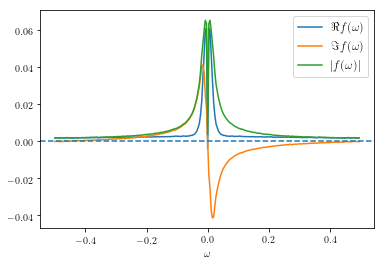

In [192]:
fig0, ax0 = plt.subplots(facecolor="white")
#ax0.plot(w[0:N//2], FFR[0:N//2], label=r'$\Re f(\omega)$')
#ax0.plot(w[0:N//2], FFI[0:N//2], label=r'$\Im f(\omega)$')
#ax0.plot(w[0:N//2], FFA[0:N//2], label=r'$|f(\omega)|$')
ax0.plot(fftshift(w), fftshift(FFR), label=r'$\Re f(\omega)$')
ax0.plot(fftshift(w), fftshift(FFI), label=r'$\Im f(\omega)$')
ax0.plot(fftshift(w), fftshift(FFA), label=r'$|f(\omega)|$')
ax0.axhline(0.0, linestyle='--')
ax0.set_xlabel(r'$\omega$')
#ax0.set_ylabel(r'$\langle C(\omega)\rangle$')
#ax0.set_ylim(bottom=-0.02, top=0.12)
ax0.legend(fontsize='large')

In [143]:
G1 = (FFA - (np.max(FFA) / 2))[0:N//2]
argmax1 = np.argmax(G1)
spline1 = spInt.InterpolatedUnivariateSpline(w[0:N//2], G1)
roots1 = spline1.roots()
G2 = (FFR - (np.max(FFR) / 2))[0:N//2]
argmax2 = np.argmax(G2)
spline2 = spInt.InterpolatedUnivariateSpline(w[0:N//2], G2)
roots2 = spline2.roots()
G3 = (F3 - (np.max(F3) / 2))[0:N//2]
argmax3 = np.argmax(G3)
spline3 = spInt.InterpolatedUnivariateSpline(w[0:N//2], G3)
roots3 = spline3.roots()
G4 = (F4 - (np.max(F4) / 2))[0:N//2]
argmax4 = np.argmax(G4)
spline4 = spInt.InterpolatedUnivariateSpline(w[0:N//2], G4)
roots4 = spline4.roots()

In [144]:
print(roots1[-1])
print(roots2[-1])
print(roots3[-1])
print(roots4[-1])

0.01235387064091884
0.012645779409831026
0.01826489112822888
0.017965331805673522


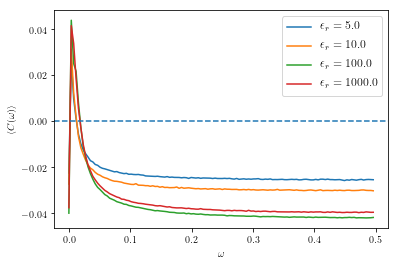

In [145]:
fig3, ax3 = plt.subplots(facecolor="white")
ax3.plot(w[0:N//2], G1[0:N//2], label=r'$\epsilon_r=5.0$')
ax3.plot(w[0:N//2], G2[0:N//2], label=r'$\epsilon_r=10.0$')
ax3.plot(w[0:N//2], G3[0:N//2], label=r'$\epsilon_r=100.0$')
ax3.plot(w[0:N//2], G4[0:N//2], label=r'$\epsilon_r=1000.0$')
ax3.axhline(0.0, linestyle='--')
ax3.set_xlabel(r'$\omega$')
ax3.set_ylabel(r'$\langle C(\omega)\rangle$')
#ax2.set_ylim(bottom=-0.02, top=0.12)
ax3.legend(fontsize='large')

In [146]:
try:
    HWL1 = roots1[-2]
    HWR1 = roots1[-1]
    for j in range(roots1.shape[-1] - 1):
        if roots1[j] < w[argmax1] and roots1[j+1] > w[argmax1]:
            HWL1 = roots1[j]
            HWR1 = roots1[j + 1]
    FW1 = HWR1 - HWL1
except IndexError:
    FW1 = np.nan

try:
    HWL2 = roots2[-2]
    HWR2 = roots2[-1]
    for j in range(roots2.shape[-1] - 1):
        if roots2[j] < w[argmax2] and roots2[j+1] > w[argmax2]:
            HWL2 = roots2[j]
            HWR2 = roots2[j + 1]
    FW2 = HWR2 - HWL2
except IndexError:
    FW2 = np.nan
    
try:
    HWL3 = roots3[-2]
    HWR3 = roots3[-1]
    for j in range(roots3.shape[-1] - 1):
        if roots3[j] < w[argmax3] and roots3[j+1] > w[argmax3]:
            HWL3 = roots3[j]
            HWR3 = roots3[j + 1]
    FW3 = HWR3 - HWL3
except IndexError:
    FW3 = np.nan

try:
    HWL4 = roots4[-2]
    HWR4 = roots4[-1]
    for j in range(roots4.shape[-1] - 1):
        if roots4[j] < w[argmax4] and roots4[j+1] > w[argmax4]:
            HWL4 = roots4[j]
            HWR4 = roots4[j + 1]
    FW4 = HWR4 - HWL4
except IndexError:
    FW4 = np.nan

In [147]:
FW3

0.017265474380680445

In [148]:
L_1 = 1/FW1
L_2 = 1/FW2
L_3 = 1/FW3
L_4 = 1/FW4

In [149]:
max1 = np.max(F1)
max2 = np.max(F2)
max3 = np.max(F3)
max4 = np.max(F4)

In [150]:
rescale1 = data1[k,1]
rescale2 = data2[k,1]
rescale3 = data3[k,1]
rescale4 = data4[k,1]

In [151]:
L_1_r = L_1 * rescale1
L_2_r = L_2 * rescale2
L_3_r = L_3 * rescale3
L_4_r = L_4 * rescale4

In [152]:
print(L_1)
print(L_2)
print(L_3)
print(L_4)

87.48000742040574
85.50652228928271
57.919057301951135
59.42086196819384
